# Stroke Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#Decisoin tree classifier
#regularization --> overfitting
#gini impurity
#Entropy
#Information Gain
#cross validation
#Feature Selection

## Handling Missing Values

In [8]:
#Imputation by mean
df["bmi"] = df["bmi"].replace(np.NaN, df["bmi"].mean())

In [9]:
#Imputation by KNN

In [10]:
df = df.drop(['id'], axis=1)

In [11]:
df.shape

(5110, 11)

# Preprocessing

## Categorical Encoding

In [12]:
#Categories 'gender', 'ever_married', 'Residence_type', 'smoking_status' a\have 2 categories so we'll use 
#dummy variables

In [13]:
df["gender"]=pd.get_dummies(data=df["gender"],drop_first=True)
df["ever_married"]=pd.get_dummies(data=df["ever_married"],drop_first=True)
df["Residence_type"]=pd.get_dummies(data=df["Residence_type"],drop_first=True)
df["smoking_status"]=pd.get_dummies(data=df["smoking_status"],drop_first=True)

In [14]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
#Category: work_type has more than 2 categories, we'll use label encoding for it
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["work_type"] = le.fit_transform(df["work_type"])

In [16]:
df["work_type"].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

## Splitting the dataset

In [17]:
X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [18]:
print(X_train.shape, y_train.shape)

(1533, 7) (1533,)


## Undersampling

In [19]:
#not preferred as a huge amount of information is lost

In [20]:
target = "stroke"

In [21]:
df[target].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [22]:
minority_class_len = len(df[df[target] == 1])
minority_class_len

249

In [23]:
majority_class_indices = df[df[target] == 0].index
majority_class_indices

Int64Index([ 249,  250,  251,  252,  253,  254,  255,  256,  257,  258,
            ...
            5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109],
           dtype='int64', length=4861)

In [24]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

249


In [25]:
minority_class_indices = df[df[target] == 1].index
minority_class_indices

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            239, 240, 241, 242, 243, 244, 245, 246, 247, 248],
           dtype='int64', length=249)

In [26]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [27]:
under_sample = df.loc[under_sample_indices]

<AxesSubplot:xlabel='stroke', ylabel='count'>

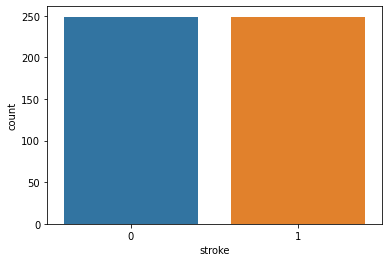

In [28]:
sns.countplot(x=target, data=under_sample)

## Oversampling

In [29]:
#We'll use SMOTE for oversampling
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()

In [30]:
X_train_oversample, y_train_oversample = over_sample.fit_resample(X_train, y_train)

## Modelling

#### Without any sampling, with imbalanced data

In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [33]:
def model_report(y, y_pred):
    print("accuracy_score = ", accuracy_score(y, y_pred))    
    print("precision_score = ", precision_score(y, y_pred))    
    print("recall_score = ", recall_score(y, y_pred))    
    print("f1_score = ", f1_score(y, y_pred))

In [62]:
# def auc_roc_curve(clf, y_pred):
#     y_pred_prob = clf.predict_proba(X_test)[:1]
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#     auc = roc_auc_curve(Y_test, y_pred_prob)
#     plt.plot(fpr, tpr, label="AUC ROC Curve with Area under curve ="+str(auc))
#     plt.legend(loc=4)
#     plt.show()
#     pass

In [56]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred = dtree.predict(X_test)

In [58]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      3404
           1       0.13      0.16      0.14       173

    accuracy                           0.91      3577
   macro avg       0.54      0.55      0.55      3577
weighted avg       0.92      0.91      0.91      3577



In [59]:
model_report(y_test, y_pred)

accuracy_score =  0.9080234833659491
precision_score =  0.12857142857142856
recall_score =  0.15606936416184972
f1_score =  0.1409921671018277


In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3221,  183],
       [ 146,   27]])

#### With oversampling, with balanced data

In [39]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train_oversample, y_train_oversample)

DecisionTreeClassifier()

In [40]:
y_pred2 = dtree2.predict(X_test)

In [41]:
print("Classification report - \n", classification_report(y_test,y_pred2))

Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      3404
           1       0.11      0.27      0.16       173

    accuracy                           0.86      3577
   macro avg       0.54      0.58      0.54      3577
weighted avg       0.92      0.86      0.89      3577



In [42]:
model_report(y_test, y_pred2)

accuracy_score =  0.861336315348057
precision_score =  0.1108433734939759
recall_score =  0.2658959537572254
f1_score =  0.1564625850340136


In [44]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[3035,  369],
       [ 127,   46]])

### Hyperparameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [68]:
grid_search = GridSearchCV(estimator=dtree2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [69]:
grid_search.fit(X_train_oversample, y_train_oversample)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [70]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [72]:
dtree_ht = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [73]:
dtree_ht.fit(X_train_oversample, y_train_oversample)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)

In [74]:
y_pred_dtree_ht = dtree_ht.predict(X_test)

In [75]:
print("Classification report - \n", classification_report(y_test,y_pred_dtree_ht))

Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92      3404
           1       0.11      0.27      0.16       173

    accuracy                           0.86      3577
   macro avg       0.54      0.58      0.54      3577
weighted avg       0.92      0.86      0.89      3577



In [76]:
model_report(y_test, y_pred_dtree_ht)

accuracy_score =  0.8590998043052838
precision_score =  0.11058823529411765
recall_score =  0.27167630057803466
f1_score =  0.15719063545150502


In [77]:
cm = confusion_matrix(y_test, y_pred_dtree_ht)
cm

array([[3026,  378],
       [ 126,   47]])